## Online Food Data Data | Modeling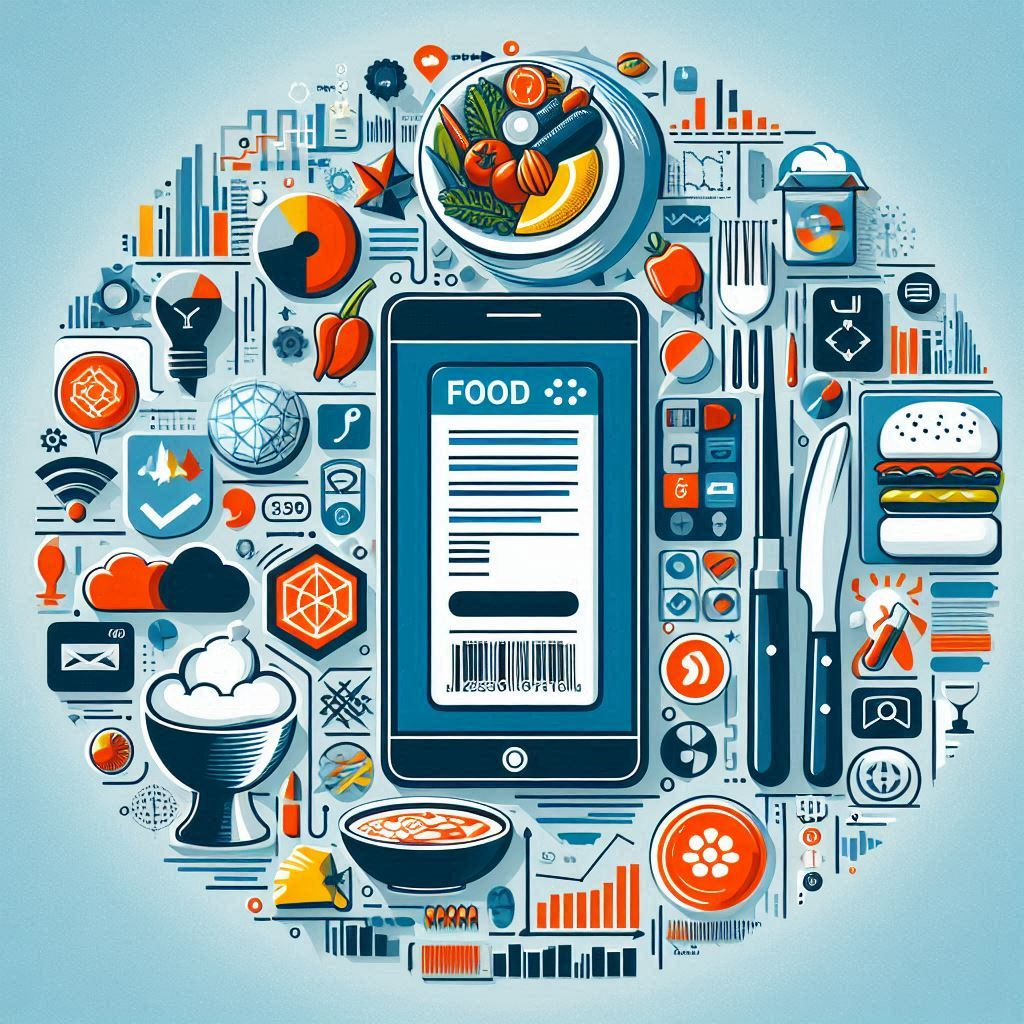

**About Data**

Description:
The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..

Attributes:
Demographic Information:
Age: Age of the customer.
Gender: Gender of the customer.
Marital Status: Marital status of the customer.
Occupation: Occupation of the customer.
Monthly Income: Monthly income of the customer.
Educational Qualifications: Educational qualifications of the customer.
Family Size: Number of individuals in the customer's family.
Location Information:
Latitude: Latitude of the customer's location.
Longitude: Longitude of the customer's location.
Pin Code: Pin code of the customer's location.
Order Details:
Output: Current status of the order (e.g., pending, confirmed, delivered).
Feedback: Feedback provided by the customer after receiving the order.

Purpose:
This dataset can be utilized to explore the relationship between demographic/location factors and online food ordering behavior, analyze customer feedback to improve service quality, and potentially predict customer preferences or behavior based on demographic and location attributes.

***#in this i am only going to do EDA***

Importing Required Libraires

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importing Dataset


In [138]:
df =pd.read_csv("https://drive.google.com/uc?id=1M0AqGLkY4H_lYGnXQFJS4i5qB7SDZtLU")

**Cleaning the Data**


In [139]:
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [140]:
df = df.drop('Unnamed: 12', axis=1)

In [141]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [142]:
df.dtypes


Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

Insight 1:- let's check Which Gender orders more food

In [143]:
g =df.groupby('Gender').count()['Age'].reset_index()
g.columns = ['Gender','Orders']
g

,Gender,Orders
0,Female,166
1,Male,222


<Axes: ylabel='Orders'>

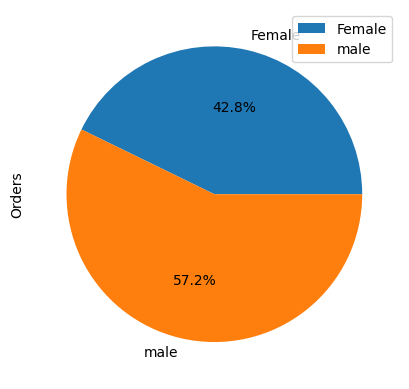

In [144]:
g.plot(y = 'Orders',labels =['Female','male'],kind = 'pie',autopct = '%1.1f%%')

In [145]:
print("From here we can see that men's user order food more than female user ")

From here we can see that men's user order food more than female user 


Insight 2:- Let's find out areas from we got most orders

In [146]:
t = df.groupby(['Pin code']).count()

In [147]:
s = t['Age'].sort_values(ascending= False).reset_index()
s.columns= ['pin code','orders']
s

,pin code,orders
0,560009,36
1,560038,16
2,560010,14
3,560076,12
4,560034,11
...,...,...
72,560098,1
73,560026,1
74,560073,1
75,560104,1


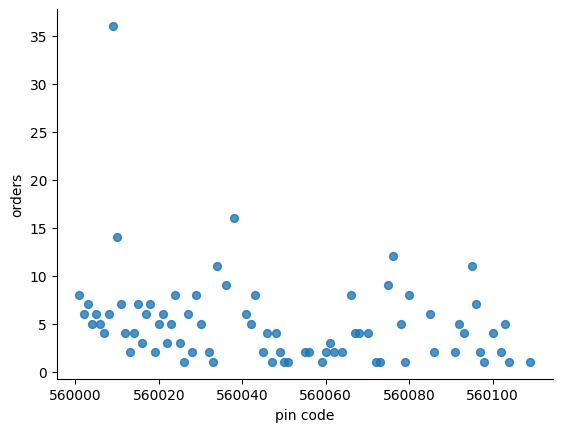

In [148]:
from matplotlib import pyplot as plt
s.plot(kind='scatter', x='pin code', y='orders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [149]:
print("From here we can see all the pin codes from which we get our most order")

From here we can see all the pin codes from which we get our most order


In [150]:
n = s.head()


In [151]:
n

,pin code,orders
0,560009,36
1,560038,16
2,560010,14
3,560076,12
4,560034,11


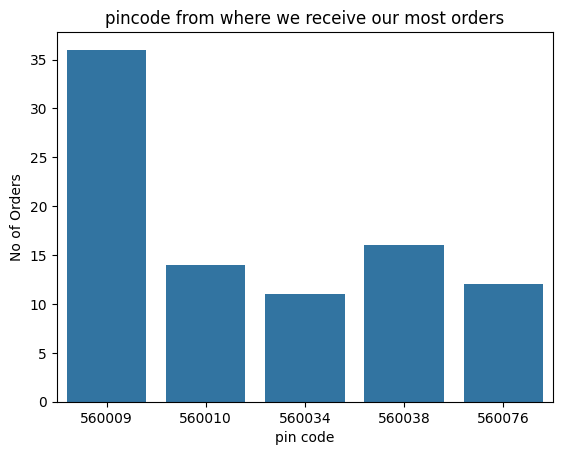

In [152]:
sns.barplot(n,x = 'pin code',y = 'orders')
plt.title("pincode from where we receive our most orders")
plt.ylabel("No of Orders")
plt.show()

In [153]:
print("From here we can see top 5 pincode where we got most orders")

From here we can see top 5 pincode where we got most orders


**Insight 3:- Lets try to find which age group mostly orders from us**

In [154]:
k = df.groupby('Age').count()['Gender']
k = k.sort_values(ascending = False)
k = k.reset_index()
k.columns = ['Age', 'order']


In [155]:
k

,Age,order
0,23,73
1,22,57
2,25,52
3,24,50
4,26,35
5,21,23
6,27,21
7,32,16
8,28,15
9,29,14


<Axes: xlabel='Age', ylabel='order'>

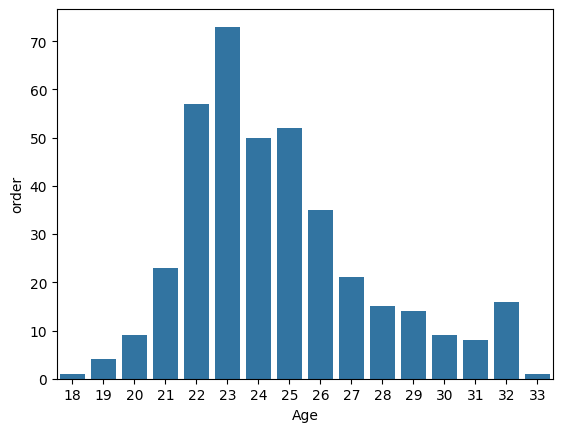

In [156]:
sns.barplot(k,x= 'Age',y = 'order')

In [157]:
print("From here we can see that we get most orders from users of age group 20-30")

From here we can see that we get most orders from users of age group 20-30


**Insight 4:- Lets try to find out educational Qualifications of our user who order most food**

In [158]:
tes = df.groupby(['Educational Qualifications','Age']).count()[['Gender']].reset_index()

In [159]:
tes.columns = ['Educational Qualification','Age','Orders']

In [160]:
tes

,Educational Qualification,Age,Orders
0,Graduate,18,1
1,Graduate,19,4
2,Graduate,20,8
3,Graduate,21,16
4,Graduate,22,29
5,Graduate,23,23
6,Graduate,24,11
7,Graduate,25,20
8,Graduate,26,18
9,Graduate,27,11


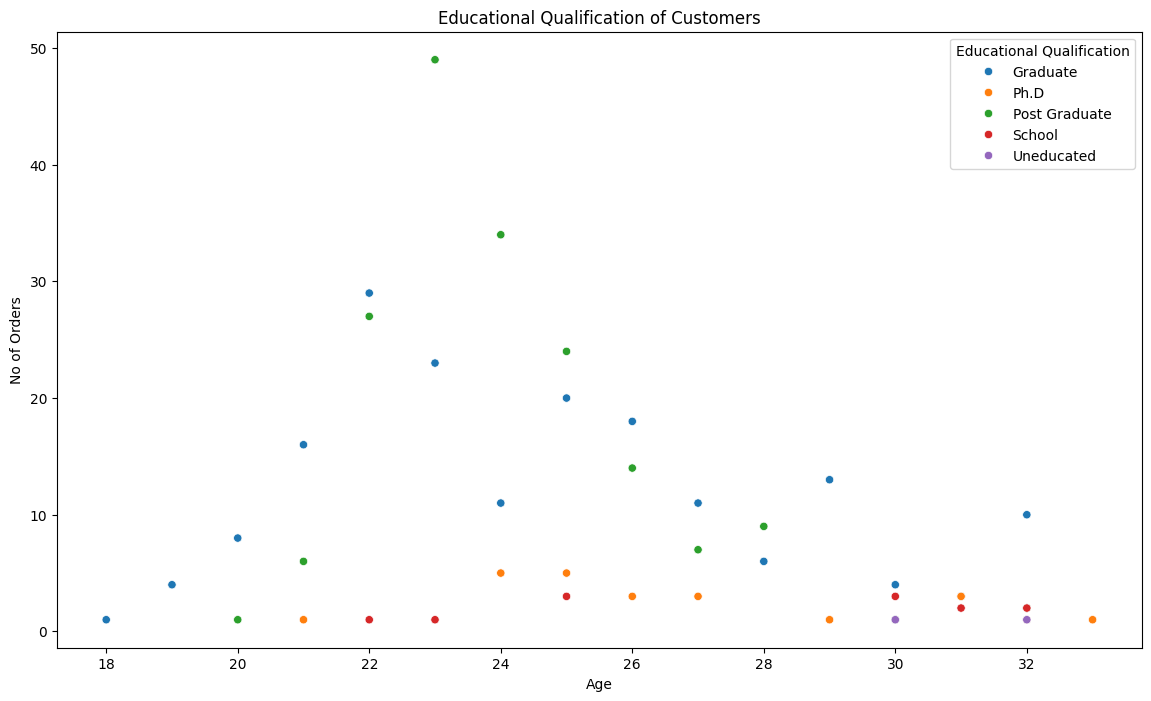

In [161]:
plt.figure(figsize=(14,8))
sns.scatterplot(tes,x= 'Age',y ='Orders',hue ='Educational Qualification')
plt.title("Educational Qualification of Customers")
plt.ylabel("No of Orders")
plt.show()

In [162]:
print("From here we can see that of our orders Come from Graduate and Post Graduate peoples")

From here we can see that of our orders Come from Graduate and Post Graduate peoples


Insight 5:- Lets try to find out our customer's are satisfied from us or not

In [163]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


In [164]:
feed = df.groupby('Feedback').count()['Age'].reset_index()
feed.columns = ['Feedback','Count']

In [165]:
feed

,Feedback,Count
0,Negative,71
1,Positive,317


<Figure size 1200x1000 with 0 Axes>

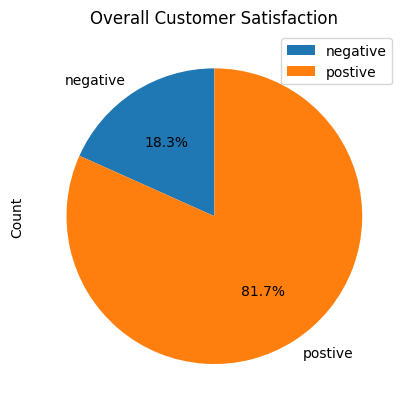

In [166]:
plt.figure(figsize=(12,10))
feed.plot(y = 'Count', labels=['negative','postive'], autopct='%1.1f%%', startangle=90,kind = 'pie')
plt.title("Overall Customer Satisfaction")
plt.show()

In [167]:
print("From here we can see 71 or 18% customers are unsatisfied from our service")

From here we can see 71 or 18% customers are unsatisfied from our service


**Insight 6:- Lets try to find out occupation of our customers who orders most food**

In [168]:
occ = df.groupby('Occupation').count()['Age'].reset_index()
occ.columns = ['Occupation','order']
occ.sort_values(by = 'order',ascending = False,inplace = True)

In [169]:
occ

,Occupation,order
3,Student,207
0,Employee,118
2,Self Employeed,54
1,House wife,9


In [170]:
print("From here we cann see students and Employees orders most food from us")

From here we cann see students and Employees orders most food from us


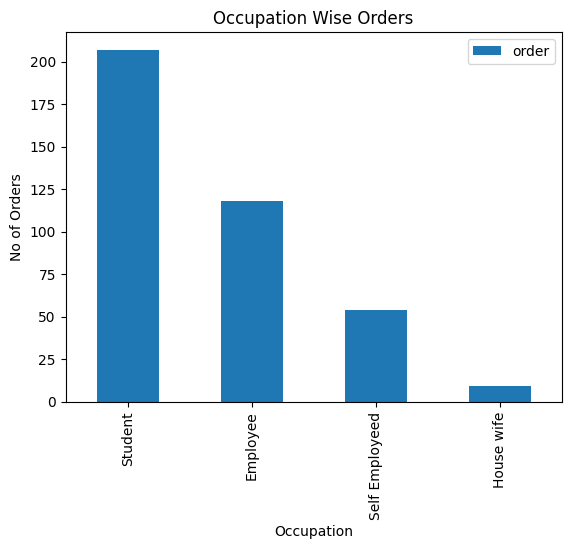

In [171]:
occ.plot(kind = 'bar', x = 'Occupation',y = 'order')
plt.title("Occupation Wise Orders")
plt.xlabel("Occupation")
plt.ylabel("No of Orders")
plt.show()

**Insight 7:- Finding how much money our customers make.**


In [172]:
money = df.groupby(['Monthly Income','Age']).count()['Gender'].reset_index()
money.columns = ['Monthly Income Range','Age','Orders']

In [173]:
money

,Monthly Income Range,Age,Orders
0,10001 to 25000,22,7
1,10001 to 25000,23,7
2,10001 to 25000,24,8
3,10001 to 25000,25,8
4,10001 to 25000,26,9
5,10001 to 25000,27,1
6,10001 to 25000,28,3
7,10001 to 25000,32,2
8,25001 to 50000,22,5
9,25001 to 50000,23,3


<Axes: xlabel='Age', ylabel='Orders'>

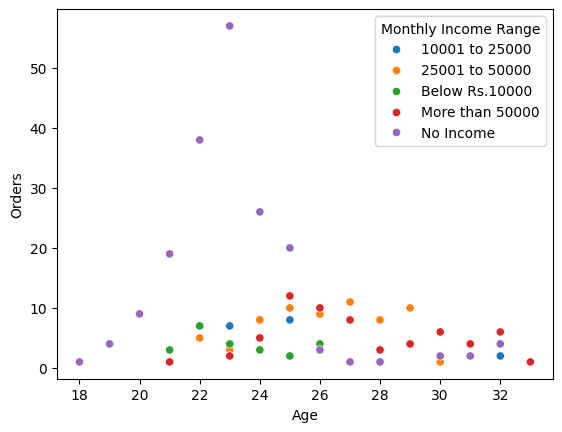

In [174]:
sns.scatterplot(money,x = 'Age',y = 'Orders',hue = 'Monthly Income Range')

In [175]:
print("We can see that most our customers do not have any source of income as They are Students")

We can see that most our customers do not have any source of income as They are Students


**Assume a customer support agent want to see details of an order from dataset.As we do not have order id in the dataset so we are writing a function from which a agent can search all the details of orders from Pin code**

In [176]:
print("Search Consumer Details via Pin code")
pin = int(input("Enter 6 digit Pin Code:- "))
stock = []
for i in range(len(df)):
  if df['Pin code'].iloc[i] == pin:
    stock.append(df.iloc[i])

stock = pd.DataFrame(stock)
stock

Search Consumer Details via Pin code
Enter 6 digit Pin Code:- 560001


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
72,25,Female,Single,Student,No Income,Post Graduate,3,12.9766,77.5993,560001,Yes,Positive
119,25,Male,Single,Employee,25001 to 50000,Graduate,3,12.9766,77.5993,560001,Yes,Positive
120,27,Female,Married,Self Employeed,More than 50000,Graduate,5,12.9766,77.5993,560001,No,Positive
121,26,Male,Single,Self Employeed,25001 to 50000,Graduate,3,12.9766,77.5993,560001,Yes,Positive
306,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive


Insight 8:- Lets try to find out which Gender and In what Age Bracket order most from us
**bold text**

In [177]:
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


In [178]:
h = df.groupby(['Age','Gender']).count()['Marital Status'].reset_index()
h.columns = ['Age','Gender','Orders']
h

,Age,Gender,Orders
0,18,Male,1
1,19,Female,1
2,19,Male,3
3,20,Female,3
4,20,Male,6
5,21,Female,6
6,21,Male,17
7,22,Female,26
8,22,Male,31
9,23,Female,41


Text(0.5, 1.0, 'age vs orders')

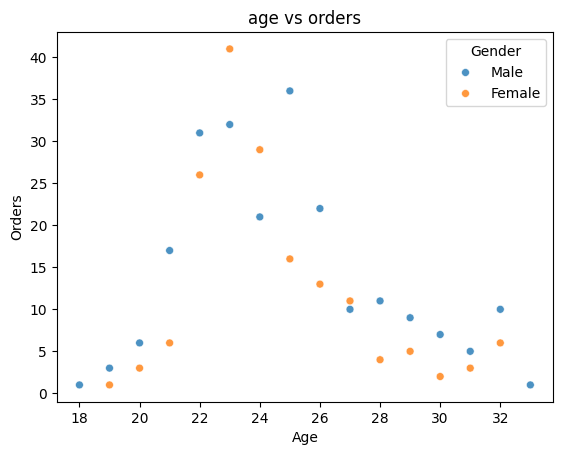

In [179]:
sns.scatterplot(h, x = 'Age',y = 'Orders',s=32, alpha=.8,hue = "Gender")
plt.title("age vs orders")

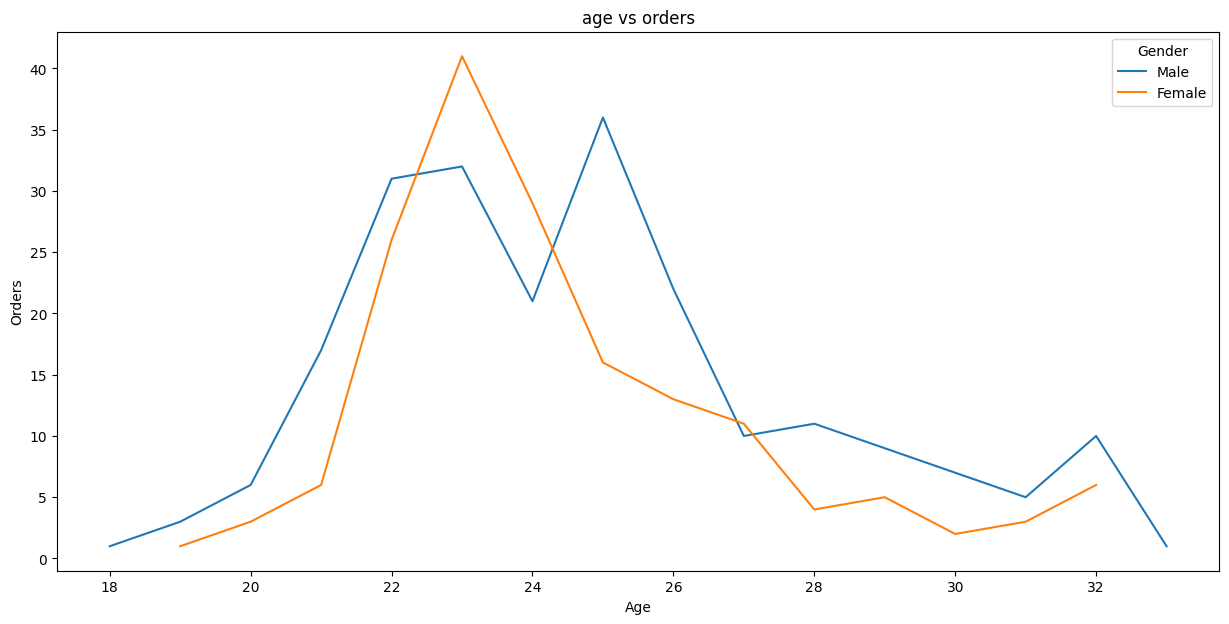

In [180]:
plt.figure(figsize=(15,7))
sns.lineplot(h, x = 'Age',y = 'Orders',hue = "Gender")
plt.title("age vs orders")
plt.show()

insight 9 :- marital Status of Customers

In [181]:
mar_sta = df.groupby('Marital Status').count()['Age'].reset_index()
mar_sta.columns = ['Marital Status','Orders']
mar_sta = mar_sta.sort_values(by='Orders', ascending=False).reset_index(drop=True)

In [182]:
mar_sta

,Marital Status,Orders
0,Single,268
1,Married,108
2,Prefer not to say,12


<Axes: xlabel='Marital Status', ylabel='Orders'>

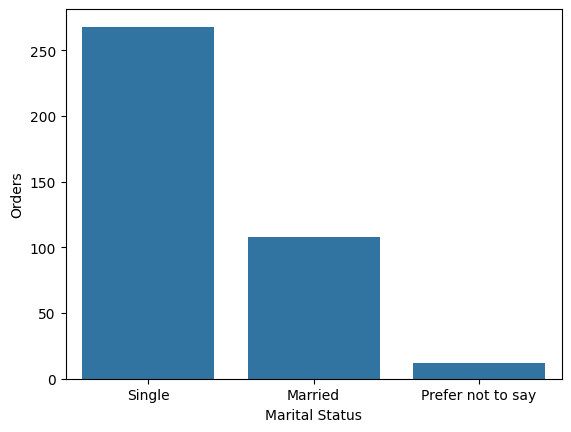

In [183]:
sns.barplot(mar_sta,x = 'Marital Status',y = 'Orders')